In [16]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# from adjustText import adjust_text
import contextily as ctx
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
# plt.style.use('science') # uncomment if you're using  https://github.com/garrettj403/SciencePlots
# map is going to be fancier

In [17]:
from shapely import wkt

# Read the JCTSL AI file into a GeoDataFrame
jctsl_ai = pd.read_csv("../data/ai/ai_jctsl.csv")
# Read the CRS information from the separate .prj file
prj_path = "../data/ai/ai_jctsl.csv".replace('.csv', '.prj')
with open(prj_path, 'r') as prj_file:
    crs = prj_file.read()

jctsl_ai['geometry'] = jctsl_ai['geometry'].apply(wkt.loads)
# Set the CRS of the GeoDataFrame
jctsl_ai = gpd.GeoDataFrame(data=jctsl_ai, geometry=jctsl_ai['geometry'], crs=crs)

In [18]:
# Read the population file into a GeoDataFrame
population = pd.read_csv("../data/ai/pop_density.csv")
# Read the CRS information from the separate .prj file
prj_path = "../data/ai/pop_density.csv".replace('.csv', '.prj')
with open(prj_path, 'r') as prj_file:
    crs = prj_file.read()

population['geometry'] = population['geometry'].apply(wkt.loads)
# Set the CRS of the GeoDataFrame
population = gpd.GeoDataFrame(data=population, geometry=population['geometry'], crs=crs)

In [19]:
jctsl_ai.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
population.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
jctsl_ai = jctsl_ai.drop(columns='index_right')

In [22]:
jctsl_ai = gpd.sjoin(jctsl_ai, population, how='left', predicate='intersects')

In [23]:
jctsl_ai

,grid,centroid,c_lon,c_lat,geometry,node,nearest_sap,destination,sap_name,network,...,EDF,weighing_factor,accessibility_index,WARD_NO_left,ZONE_NAME_left,pop_density_per_sq_km_left,index_right,WARD_NO_right,ZONE_NAME_right,pop_density_per_sq_km_right
0,"1179963.280286 999017.520396, 1179963.280286 1...",POINT (1180463.2802863133 999517.520395831),75.692981,26.869000,"POLYGON ((75.68787 26.86455, 75.68802 26.87358...",10081117619,POINT (569276.577632891 2972313.6484731887),1.008112e+10,BHAKROTA,JCTSL,...,2.142857,0.5,1.071429,NaN,NaN,6935.376315,8,NaN,NaN,6935.376315
0,"1179963.280286 999017.520396, 1179963.280286 1...",POINT (1180463.2802863133 999517.520395831),75.692981,26.869000,"POLYGON ((75.68787 26.86455, 75.68802 26.87358...",10081117619,POINT (569276.577632891 2972313.6484731887),1.008112e+10,BHAKROTA,JCTSL,...,2.142857,0.5,1.071429,NaN,NaN,6935.376315,9,29.0,SANGANER,4127.213849
0,"1179963.280286 999017.520396, 1179963.280286 1...",POINT (1180463.2802863133 999517.520395831),75.692981,26.869000,"POLYGON ((75.68787 26.86455, 75.68802 26.87358...",10081117619,POINT (569276.577632891 2972313.6484731887),1.008112e+10,BHAKROTA,JCTSL,...,2.142857,0.5,1.071429,NaN,NaN,6935.376315,0,NaN,NaN,6935.376315
0,"1179963.280286 999017.520396, 1179963.280286 1...",POINT (1180463.2802863133 999517.520395831),75.692981,26.869000,"POLYGON ((75.68787 26.86455, 75.68802 26.87358...",10081117619,POINT (569276.577632891 2972313.6484731887),1.008112e+10,BHAKROTA,JCTSL,...,2.142857,0.5,1.071429,NaN,NaN,6935.376315,1,NaN,NaN,6935.376315
1,"1179963.280286 999017.520396, 1179963.280286 1...",POINT (1180463.2802863133 999517.520395831),75.692981,26.869000,"POLYGON ((75.68787 26.86455, 75.68802 26.87358...",10081117619,POINT (569276.577632891 2972313.6484731887),1.008112e+10,BHAKROTA,JCTSL,...,2.142857,0.5,1.071429,29.0,SANGANER,4127.213849,8,NaN,NaN,6935.376315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,"1200963.280286 1008017.520396, 1200963.280286 ...",POINT (1201463.2802863133 1008517.520395831),75.905953,26.947417,"POLYGON ((75.90083 26.94297, 75.90099 26.95201...",8620296159,POINT (588026.6741264729 2981164.7440205347),4.757304e+09,HARJI VIHAR,JCTSL,...,0.685453,0.5,0.342727,76.0,HAWA MAHAL,3711.075770,830,76.0,HAWA MAHAL,3711.075770
5465,"1200963.280286 1008017.520396, 1200963.280286 ...",POINT (1201463.2802863133 1008517.520395831),75.905953,26.947417,"POLYGON ((75.90083 26.94297, 75.90099 26.95201...",8620296159,POINT (588026.6741264729 2981164.7440205347),4.757304e+09,HARJI VIHAR,JCTSL,...,0.685453,0.5,0.342727,76.0,HAWA MAHAL,3711.075770,842,76.0,HAWA MAHAL,3711.075770
5465,"1200963.280286 1008017.520396, 1200963.280286 ...",POINT (1201463.2802863133 1008517.520395831),75.905953,26.947417,"POLYGON ((75.90083 26.94297, 75.90099 26.95201...",8620296159,POINT (588026.6741264729 2981164.7440205347),4.757304e+09,HARJI VIHAR,JCTSL,...,0.685453,0.5,0.342727,76.0,HAWA MAHAL,3711.075770,843,76.0,HAWA MAHAL,3711.075770
5465,"1200963.280286 1008017.520396, 1200963.280286 ...",POINT (1201463.2802863133 1008517.520395831),75.905953,26.947417,"POLYGON ((75.90083 26.94297, 75.90099 26.95201...",8620296159,POINT (588026.6741264729 2981164.7440205347),4.757304e+09,HARJI VIHAR,JCTSL,...,0.685453,0.5,0.342727,76.0,HAWA MAHAL,3711.075770,829,76.0,HAWA MAHAL,3711.075770


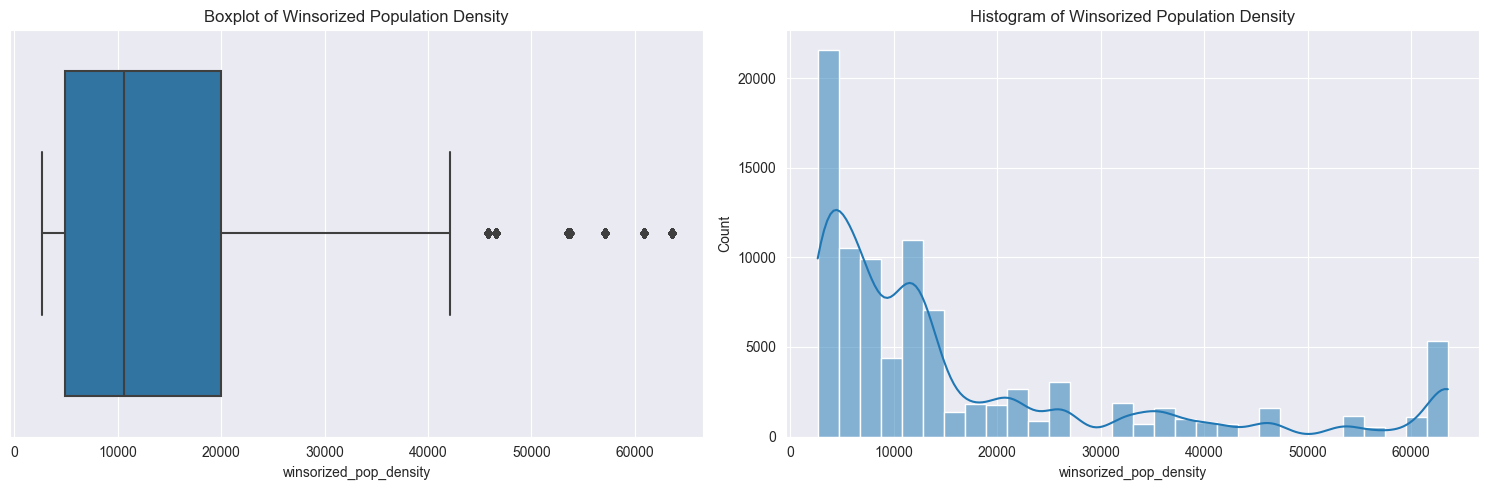

In [25]:
from scipy.stats.mstats import winsorize

# Applying Winsorizing to the 'pop_density_per_sq_km' column
# Setting limits for winsorizing at 5th and 95th percentiles
jctsl_ai['winsorized_pop_density'] = winsorize(jctsl_ai['pop_density_per_sq_km_right'], limits=[0.05, 0.05])

# Plotting boxplot and histogram for the winsorized 'pop_density_per_sq_km' data

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot for winsorized_pop_density
sns.boxplot(ax=axes[0], data=jctsl_ai, x='winsorized_pop_density')
axes[0].set_title('Boxplot of Winsorized Population Density')

# Histogram for winsorized_pop_density
sns.histplot(ax=axes[1], data=jctsl_ai, x='winsorized_pop_density', bins=30, kde=True)
axes[1].set_title('Histogram of Winsorized Population Density')

plt.tight_layout()
plt.show()

In [26]:
# Categorizing the 'winsorized_pop_density' and 'accessibility_index' into quartiles
jctsl_ai['pop_density_cat'] = pd.qcut(jctsl_ai['winsorized_pop_density'], 3, labels=False)
jctsl_ai['accessibility_cat'] = pd.qcut(jctsl_ai['accessibility_index'], 3, labels=[2,1,0])

# Create a new column that combines both categories for color mapping
jctsl_ai['bivariate_cat'] = jctsl_ai['pop_density_cat'].astype(str) + jctsl_ai['accessibility_cat'].astype(str)

In [27]:
# Create a color map for the bivariate categories
unique_categories = jctsl_ai['bivariate_cat'].unique()

In [28]:
unique_categories

array(['10', '00', '11', '01', '02', '12', '22', '21', '20'], dtype=object)

In [29]:
from credentials import credentials

In [30]:
mapbox_access_token = credentials.get_mapbox_token()

In [31]:
import plotly.express as px

# Create a color map dictionary for the bivariate categories
unique_categories = jctsl_ai['bivariate_cat'].unique()
all_colors = ['#e8e8e8', '#b0d5df', '#64acbe', '#e4acac', '#ad9ea5', '#627f8c', '#c85a5a', '#985356', '#574249']
color_map = {cat: all_colors[i % len(all_colors)] for i, cat in enumerate(sorted(unique_categories))}

# Concatenate the desired columns into a single string for hover information
jctsl_ai['hover_info'] = jctsl_ai['ZONE_NAME_right'] + '<br>' + \
                         'Accessibility Index: ' + jctsl_ai['accessibility_index'].astype(str) + '<br>' + \
                         'Pop Density per Sq Km: ' + jctsl_ai['pop_density_per_sq_km_right'].astype(str)

# Create the interactive plot
fig = px.choropleth_mapbox(jctsl_ai,
                           geojson=jctsl_ai.__geo_interface__,
                           locations=jctsl_ai.index,
                           color='bivariate_cat',
                           hover_name='hover_info',
                           color_discrete_map=color_map,  # Using the custom color map
                           mapbox_style="light",  # Choose a Mapbox style: light, dark, satellite, etc.
                           zoom=10,  # Adjust the zoom level to your preference
                           opacity=0.5)

def add_rectangle(fig, x0, x1, y0, y1, color):
    fig.add_shape(type="rect",
                  x0=x0, y0=y0, x1=x1, y1=y1,
                  line=dict(color="black"),
                  fillcolor=color)

# Add rectangles for each color
for i in range(3):
    for j in range(3):
        color_index = i * 3 + j
        add_rectangle(fig, x0=0.1 + j*0.03, x1=0.13 + j*0.03, y0=0.1 + i*0.03, y1=0.13 + i*0.03, color=all_colors[color_index])

# Add annotations for legend labels
fig.add_annotation(x=0.1, y=0.08, text="Population Density (Categorical)", showarrow=False, font=dict(color="black"),)
fig.add_annotation(x=0.09, y=0.1, text="Accessibility Index", showarrow=False, textangle=-90, font=dict(color="black"), )


fig.update_layout(
    title_text='Choropleth Map: Accessibility Index (JCTSl) vs Population Density',
    mapbox_style='mapbox://styles/mapbox/streets-v12',
    mapbox_accesstoken=mapbox_access_token,
    showlegend=False,
    mapbox_zoom=10,  # Adjust the initial zoom level
    mapbox_center={'lat': 26.933985, 'lon': 75.873857},
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig.write_html('../figures/AI_pop-bus.html',
               full_html=False,
               include_plotlyjs='cdn')
# Show the figure
# fig.show()



In [ ]:
jctsl_ai